In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ["t-shirt/top", "Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle-Boot"]

#  Data Reshape

In [5]:
x_train_full = x_train_full.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

# Data Normalization

In [6]:
x_train_n = x_train_full/255
x_test_n = x_test/255

# Split the Data into Train/Validation/Test Sets

In the earlier step of importing the data, we had 60000 datasets for training and 10000 test datasets. Now we further split the training data into train/validation. here's how each of the dataset is used in deep learning
 - Training Data -- used for training the model
 - Validation Data -- used for tuning the hyperparameters and evaluate the models
 - Test data -- used to test the model after it has gone through the initial vetting by the validation set

In [7]:
x_valid, x_train = x_train_n[:5000],x_train_n[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test_n

# Create Model Architecture

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

#  Architecture

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = "relu", input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [11]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [12]:
model_history = model.fit(x_train, y_train, epochs = 30, batch_size = 64, 
                         validation_data = (x_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 42s 49ms/step - loss: 0.8766 - accuracy: 0.6991 - val_loss: 0.7547 - val_accuracy: 0.7348
Epoch 2/30
860/860 [==============================] - 39s 46ms/step - loss: 0.5385 - accuracy: 0.8047 - val_loss: 0.4897 - val_accuracy: 0.8192
Epoch 3/30
860/860 [==============================] - 40s 47ms/step - loss: 0.4809 - accuracy: 0.8262 - val_loss: 0.9119 - val_accuracy: 0.7100
Epoch 4/30
860/860 [==============================] - 41s 48ms/step - loss: 0.4439 - accuracy: 0.8415 - val_loss: 0.4147 - val_accuracy: 0.8566
Epoch 5/30
860/860 [==============================] - 39s 46ms/step - loss: 0.4200 - accuracy: 0.8500 - val_loss: 0.4400 - val_accuracy: 0.8458
Epoch 6/30
860/860 [==============================] - 40s 46ms/step - loss: 0.3956 - accuracy: 0.8585 - val_loss: 0.3762 - val_accuracy: 0.8706
Epoch 7/30
860/860 [==============================] - 40s 47ms/step - loss: 0.3781 - accuracy: 0.8659 - val_loss: 0.4037 - val_accuracy:

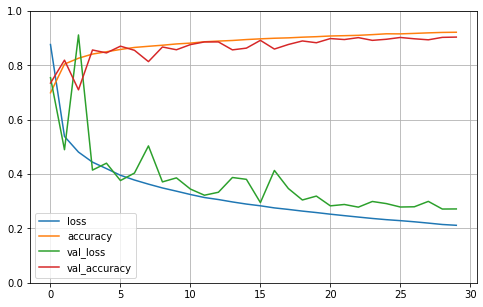

In [13]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
ev = model.evaluate(x_test_n, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2810 - accuracy: 0.8978


In [15]:
ev

[0.2809881567955017, 0.8978000283241272]

In [16]:
x_new = x_test[:3]

In [17]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [18]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


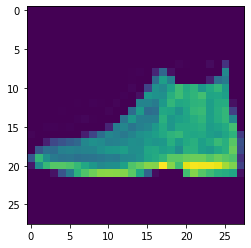

In [19]:
print(plt.imshow(x_test[0].reshape((28,28))))

In [20]:
keras.backend.clear_session()

In [21]:
del model

# Pooling vs No Pooling

In [22]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = "relu", input_shape = (28,28,1)))
model_a.add(keras.layers.MaxPooling2D(2,2))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation = "relu"))
model_a.add(keras.layers.Dense(100, activation = "relu"))
model_a.add(keras.layers.Dense(10, activation = "softmax"))

model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = "relu", input_shape = (28,28,1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation = "relu"))
model_b.add(keras.layers.Dense(100, activation = "relu"))
model_b.add(keras.layers.Dense(10, activation = "softmax"))

In [23]:
model_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [24]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_a.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

model_b.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [26]:
model_history_a = model_a.fit(x_train, y_train, epochs = 3, batch_size = 64, 
                         validation_data = (x_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 37s 43ms/step - loss: 0.8467 - accuracy: 0.7085 - val_loss: 0.7915 - val_accuracy: 0.7100
Epoch 2/3
860/860 [==============================] - 38s 45ms/step - loss: 0.5358 - accuracy: 0.8066 - val_loss: 0.4994 - val_accuracy: 0.8078
Epoch 3/3
860/860 [==============================] - 38s 44ms/step - loss: 0.4789 - accuracy: 0.8271 - val_loss: 0.9672 - val_accuracy: 0.6948


In [27]:
model_history_b = model_b.fit(x_train, y_train, epochs = 3, batch_size = 64, 
                         validation_data = (x_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 85s 99ms/step - loss: 0.7398 - accuracy: 0.7450 - val_loss: 0.7188 - val_accuracy: 0.7528
Epoch 2/3
860/860 [==============================] - 86s 100ms/step - loss: 0.4946 - accuracy: 0.8219 - val_loss: 0.4747 - val_accuracy: 0.8166
Epoch 3/3
860/860 [==============================] - 85s 99ms/step - loss: 0.4430 - accuracy: 0.8396 - val_loss: 0.9764 - val_accuracy: 0.6956
